In [31]:
from config import states_dict
import matplotlib.pyplot as plt
import pandas as pd
import os

for country in ("Austria", "Australia"):
    images_per_state = []
    images_per_country = 0
    locations_per_country = 0
    for state in states_dict[country]:
        df = pd.read_csv(f"images/{country}/{state}/coordinates.csv", index_col= "i")
        image_exists = []
        for index in range(len(df)):
            if os.path.isfile(f"images/{country}/{state}/{index}.jpg"):
                image_exists.append(True)
            else:
                image_exists.append(False)
        df["image_exists"] = image_exists
        images_per_country += sum(df['image_exists'])
        locations_per_country += len(df)
    
    print(f"{images_per_country} images out of {locations_per_country} locations.")


12504 images out of 13128 locations.
12560 images out of 12599 locations.


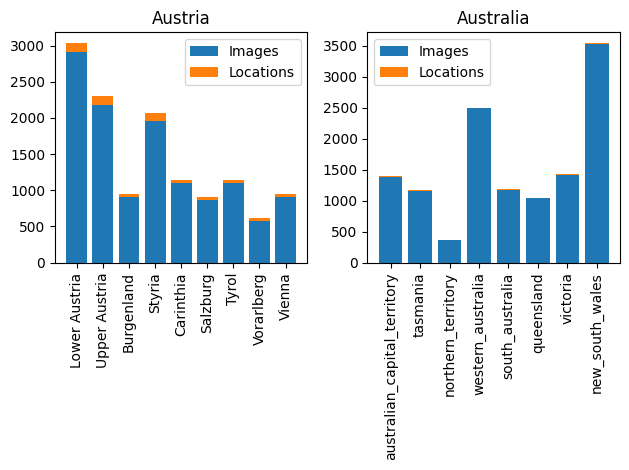

In [44]:
import numpy as np
fig, axs = plt.subplots(ncols = 2)
for (i,country) in enumerate(("Austria", "Australia")):
    images_per_state = []
    locations_per_state = []
    for state in states_dict[country]:
        df = pd.read_csv(f"images/{country}/{state}/coordinates.csv", index_col= "i")
        images_per_state.append(sum(df["image_exists"]))
        locations_per_state.append(len(df))

    axs[i].bar(states_dict[country], images_per_state, label = "Images")
    axs[i].bar(states_dict[country], np.array(locations_per_state) - np.array(images_per_state), bottom=images_per_state, label = "Locations")
    axs[i].set_title(country)
    axs[i].tick_params('x', labelrotation=90)
    axs[i].legend()
plt.tight_layout()
plt.show()